In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
train_path=r'C:\Users\HP\OneDrive\Desktop\deep_learning_lab\new_dataset\train'
test_path=r'C:\Users\HP\OneDrive\Desktop\deep_learning_lab\new_dataset\test'

IMG_SIZE=(250,250)
BATCH_SIZE=32


train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

test_datagen=ImageDataGenerator(rescale=1./255)

train_data=train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_data=train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_data=test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1440 images belonging to 7 classes.
Found 286 images belonging to 7 classes.
Found 363 images belonging to 7 classes.


In [ ]:
# LeNet architecture

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
model = keras.Sequential([
    layers.Conv2D(filters=6, kernel_size=(5,5), activation="tanh", input_shape=(250,250,3)),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),

    layers.Conv2D(filters=16, kernel_size=(5,5), activation="tanh"),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),

    # C5 (3rd Conv Layer)
    layers.Conv2D(filters=120, kernel_size=(5,5), activation="tanh", padding="SAME"),

    layers.Flatten(),
    layers.Dense(units=84, activation="tanh"),
    layers.Dense(units=7, activation="softmax")  # Output layer
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Show the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 246, 246, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 123, 123, 6)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 119, 119, 16)        │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 59, 59, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 59, 59, 120)         │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 417720)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 84)                  │      35,088,564 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             595 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,140,151 (134.05 MB)

 Trainable params: 35,140,151 (134.05 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [13]:
history=model.fit(train_data,
         epochs=10,
         validation_data=val_data)

Epoch 1/10


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.1496 - loss: 4.7240 - val_accuracy: 0.2028 - val_loss: 3.1330
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.1879 - loss: 2.8792 - val_accuracy: 0.2028 - val_loss: 2.0135
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.1898 - loss: 1.9483 - val_accuracy: 0.2028 - val_loss: 1.8996
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.2254 - loss: 1.9071 - val_accuracy: 0.2028 - val_loss: 1.9093
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.2128 - loss: 1.9103 - val_accuracy: 0.2343 - val_loss: 1.8964
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.2219 - loss: 1.9050 - val_accuracy: 0.2343 - val_loss: 1.8975
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.2142 - loss: 1.9158 - val_accuracy: 0.2343 - val_loss: 1.9007
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.2494 - loss: 1.9075 - val_accuracy: 0.2028 - val_loss: 1.9021
Epo

In [ ]:
test_loss, test_acc=model.evaluate(test_data)
print(f"Test Accuracy:{test_acc:.2f}")

In [14]:
test_loss, test_acc=model.evaluate(test_data)
print(f"Test Accuracy:{test_acc:.2f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 629ms/step - accuracy: 0.0999 - loss: 3.2907
Test Accuracy:0.11


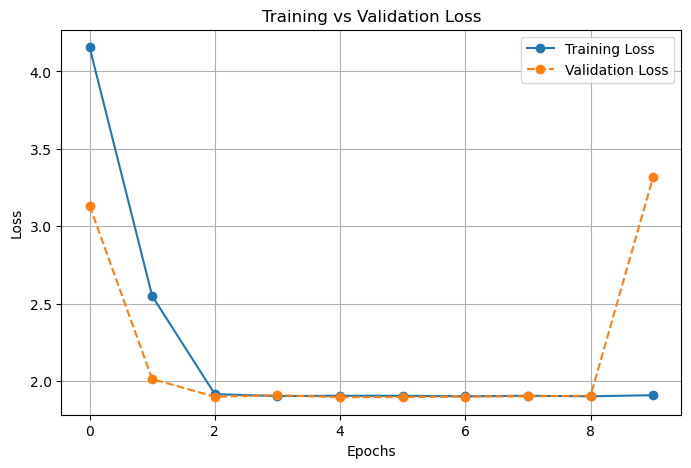

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o', linestyle='dashed')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()

In [3]:
# AlexNet architecture

In [4]:
from keras.models import Sequential
from keras.layers import Input,Conv2D, AveragePooling2D, Flatten, Dense,Activation,MaxPool2D, BatchNormalization, Dropout
from keras.regularizers import l2

In [5]:
# Instantiate an empty sequential model
model = Sequential(name="Alexnet")
model.add(Input(shape=(250,250,3)))
# 1st layer (conv + pool + batchnorm)
model.add(Conv2D(filters= 96, kernel_size= (11,11), strides=(4,4), padding='valid', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))  #<---- activation function can be added on its own layer or within the Conv2D function
model.add(MaxPool2D(pool_size=(3,3), strides= (2,2), padding='valid'))
model.add(BatchNormalization())
    
# 2nd layer (conv + pool + batchnorm)
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
            
# layer 3 (conv + batchnorm)      <--- note that the authors did not add a POOL layer here
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
        
# layer 4 (conv + batchnorm)      <--- similar to layer 3
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
            
# layer 5 (conv + batchnorm)  
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=l2(0.0005)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())

# layer 6 (Dense layer + dropout)  
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))

# layer 7 (Dense layers) 
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.5))
                           
# layer 8 (softmax output layer) 
model.add(Dense(units = 7, activation = 'softmax'))

In [6]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "Alexnet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 60, 60, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 60, 60, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 29, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 29, 29, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 29, 29, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 14, 14, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 14, 14, 384)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 384)         │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │              

 Total params: 58,315,527 (222.46 MB)

 Trainable params: 58,312,775 (222.45 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [7]:
history=model.fit(train_data,
         epochs=10,
         validation_data=val_data)

Epoch 1/10


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.2417 - loss: 31.6204 - val_accuracy: 0.1119 - val_loss: 52.2000
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.3459 - loss: 4.2725 - val_accuracy: 0.1084 - val_loss: 5.5893
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.3419 - loss: 3.1976 - val_accuracy: 0.1748 - val_loss: 3.0720
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.3854 - loss: 2.6277 - val_accuracy: 0.3497 - val_loss: 2.4284
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.4078 - loss: 2.3576 - val_accuracy: 0.3636 - val_loss: 2.1546
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.3549 - loss: 2.3372 - val_accuracy: 0.3986 - val_loss: 2.2459
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.4461 - loss: 2.2262 - val_accuracy: 0.3217 - val_loss: 2.2784
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.4106 - loss: 2.1807 - val_accuracy: 0.1958 - val_loss: 4.

In [8]:
test_loss, test_acc=model.evaluate(test_data)
print(f"Test Accuracy:{test_acc:.2f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 637ms/step - accuracy: 0.2547 - loss: 2.7119
Test Accuracy:0.25


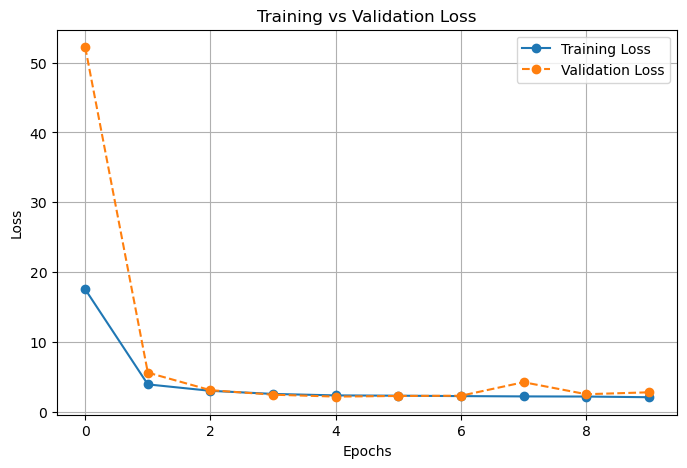

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))

plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o', linestyle='dashed')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()